# Auto Insurance Fraud Detection

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

## 2. Data Preprocessing

### A) Quick Look

In [2]:
df=pd.read_csv('/Users/hayaayu/Users/hayaayu/Career Thingy/Portfolio/insurance-fraud-detection/insurance_claims.csv')

In [3]:
df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [4]:
# we can see some missing values denoted by '?' so lets replace missing values with np.nan

df.replace('?', np.nan, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

### B) Missing Value Handling

In [6]:
# missing values
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

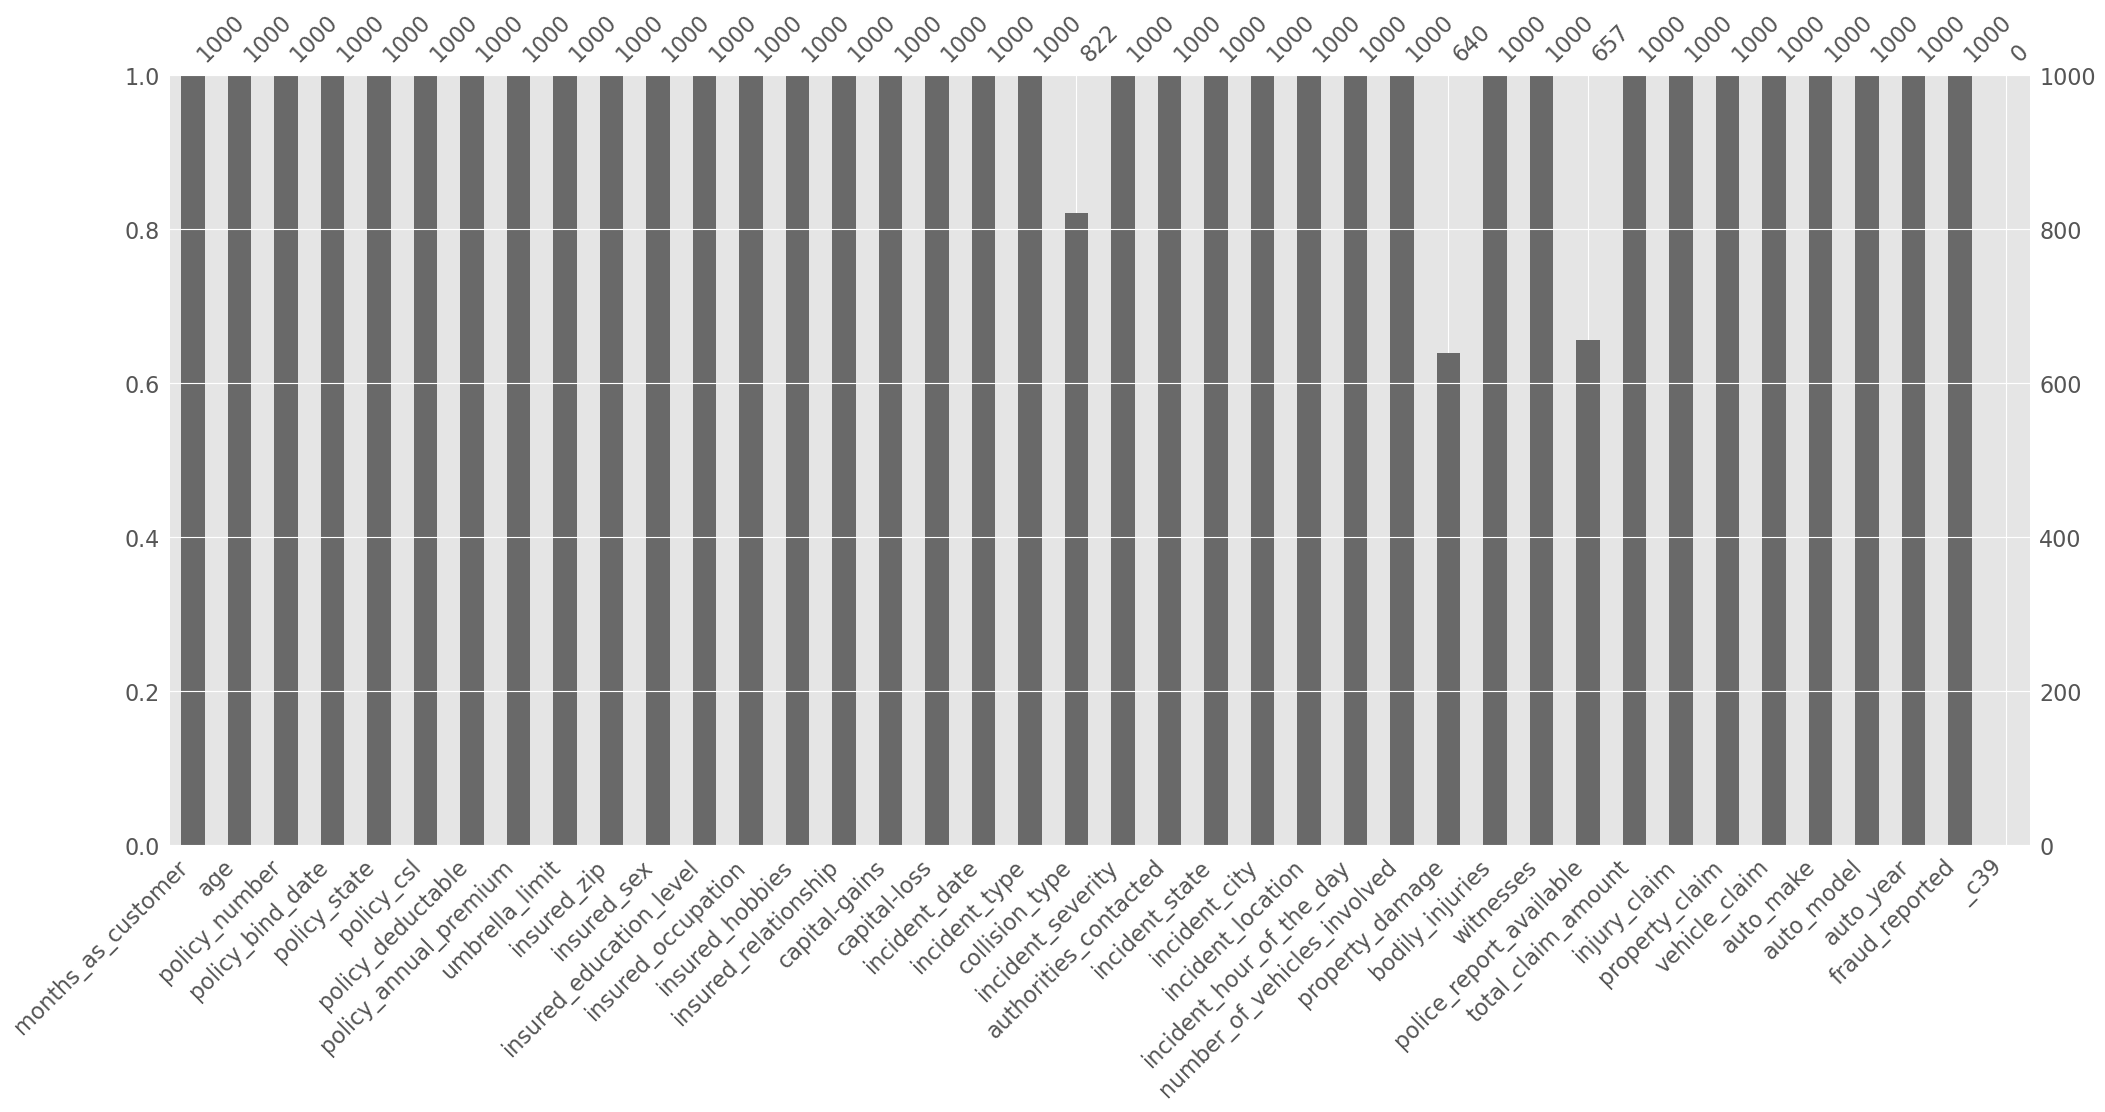

In [7]:
# visualizing missing value
import missingno as msno

msno.bar(df)
plt.show()

In [8]:
# imputing collision type
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])

# imputing property damage
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])

# imputing police report
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [9]:
# recheck
df.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

### C) Correlation Checking

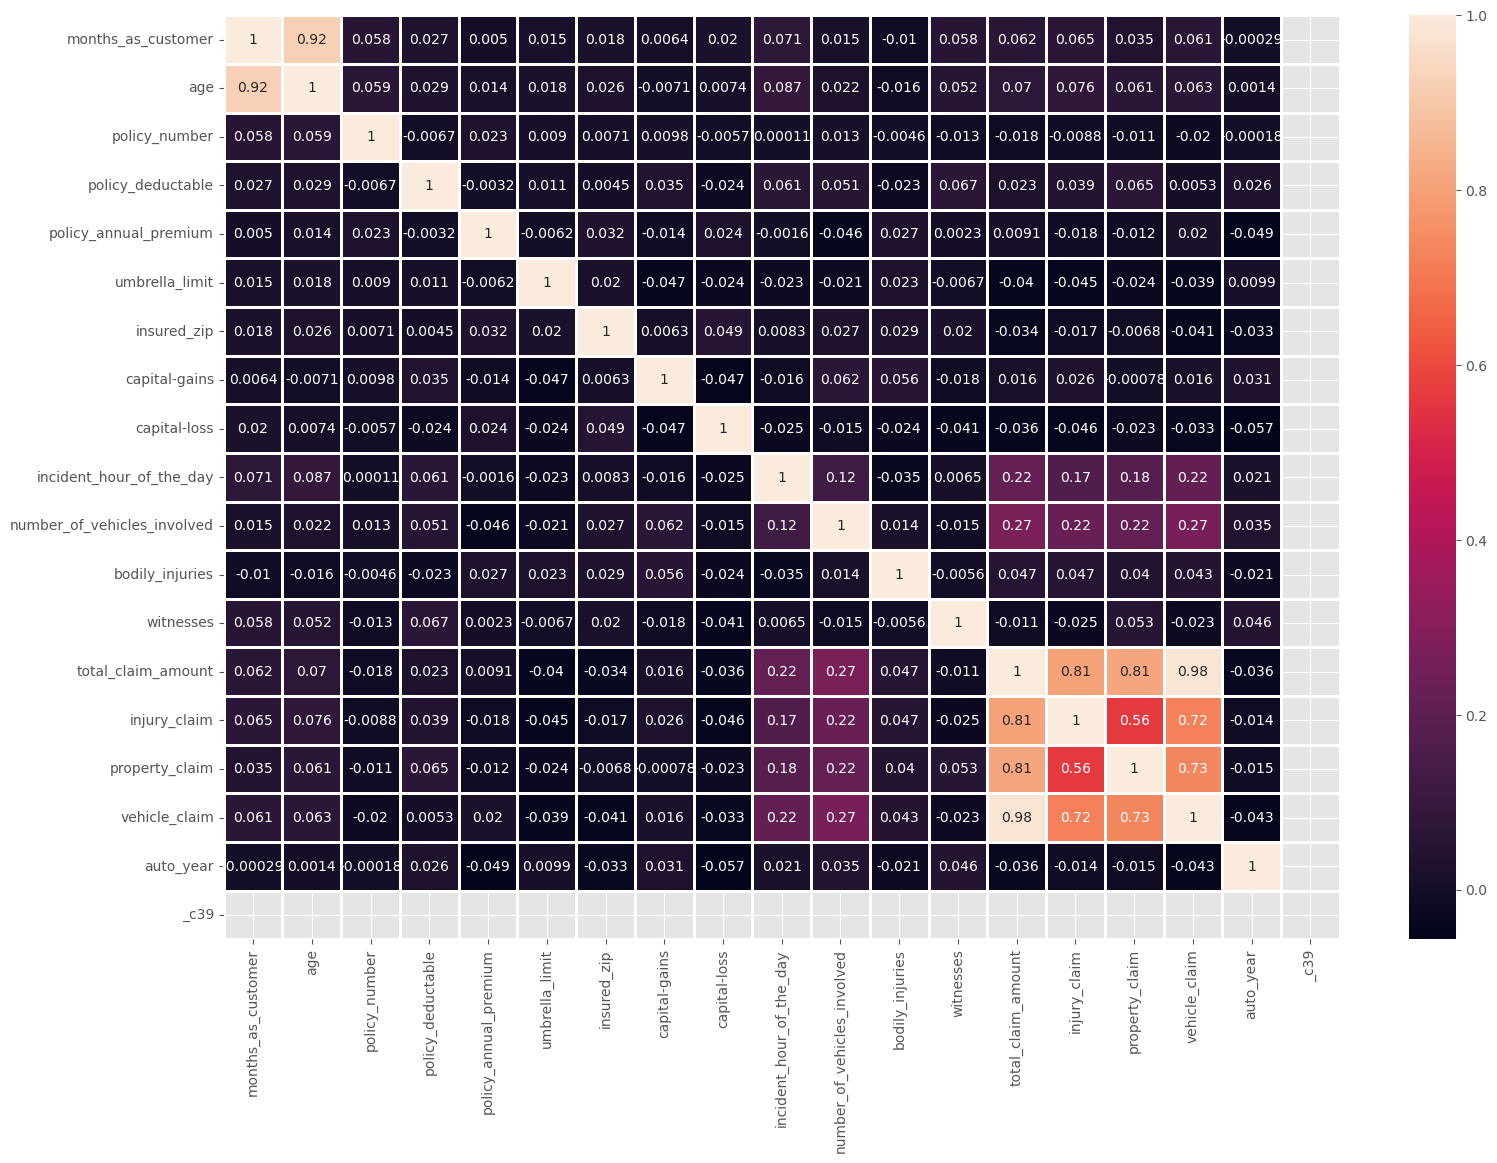

In [10]:
# heatmap

plt.figure(figsize = (18, 12))

corr = df.corr()

sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [11]:
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [12]:
# dropping columns which are not necessary for prediction

to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year', '_c39']

df.drop(to_drop, inplace = True, axis = 1)

### D) Multicollinearity Study

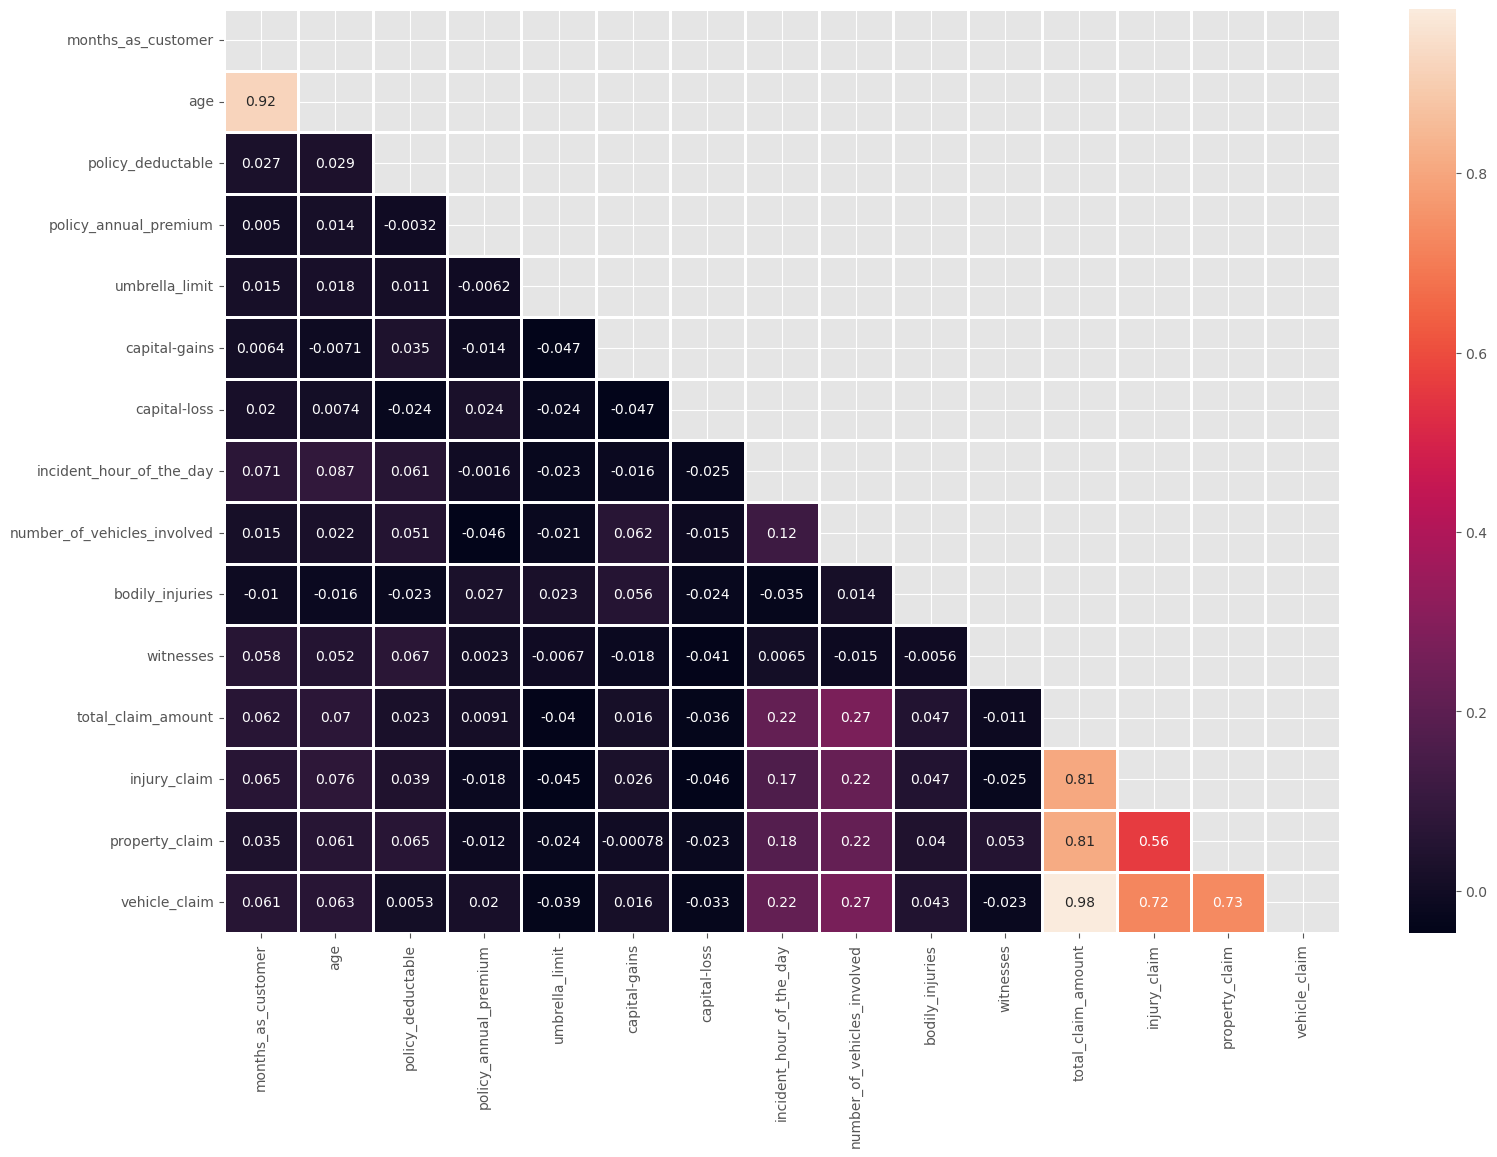

In [13]:
# checking for multicollinearity

plt.figure(figsize = (18, 12))

corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(data = corr, mask = mask, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

From the above plot, we can see that there is high correlation between `age` and `months_as_customer`. We will drop the "Age" column. Also there is high correlation between `total_clam_amount`, `injury_claim`, `property_claim`, `vehicle_claim` as total claim is the sum of all others. So we will drop the total claim column.

In [14]:
df.drop(columns = ['age', 'total_claim_amount'], inplace = True, axis = 1)

In [15]:
df.head()

months_as_customer policy_csl  policy_deductable  policy_annual_premium  \
0                 328    250/500               1000                1406.91   
1                 228    250/500               2000                1197.22   
2                 134    100/300               2000                1413.14   
3                 256    250/500               2000                1415.74   
4                 228   500/1000               1000                1583.91   

   umbrella_limit insured_sex insured_education_level insured_occupation  \
0               0        MALE                      MD       craft-repair   
1         5000000        MALE                      MD  machine-op-inspct   
2         5000000      FEMALE                     PhD              sales   
3         6000000      FEMALE                     PhD       armed-forces   
4         6000000        MALE               Associate              sales   

  insured_relationship  capital-gains  ...  incident_hour_of_the_day  \
0              husband          53300  ...                         5   
1       other-relative              0  ...                         8   
2            own-child          35100  ...                         7   
3            unmarried          48900  ...                         5   
4            unmarried          66000  ...                        20   

  number_of_vehicles_involved property_damage bodily_injuries witnesses  \
0                           1             YES               1         2   
1                           1              NO               0         0   
2                           3              NO               2         3   
3                           1              NO               1         2   
4                           1              NO               0         1   

   police_report_available  injury_claim property_claim  vehicle_claim  \
0                      YES          6510          13020          52080   
1                       NO           780            780           3510   
2                       NO          7700           3850          23100   
3                       NO          6340           6340          50720   
4                       NO          1300            650           4550   

   fraud_reported  
0               Y  
1               Y  
2               N  
3               Y  
4               N  

[5 rows x 25 columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               1000 non-null   object 
 13  incident_severity  

In [17]:
# separating the feature and target columns

X = df.drop('fraud_reported', axis = 1)
y = df['fraud_reported']

### E) Feature Encoding

In [18]:
# extracting categorical columns
cat_df = X.select_dtypes(include = ['object'])

In [19]:
cat_df.head()

policy_csl insured_sex insured_education_level insured_occupation  \
0    250/500        MALE                      MD       craft-repair   
1    250/500        MALE                      MD  machine-op-inspct   
2    100/300      FEMALE                     PhD              sales   
3    250/500      FEMALE                     PhD       armed-forces   
4   500/1000        MALE               Associate              sales   

  insured_relationship             incident_type   collision_type  \
0              husband  Single Vehicle Collision   Side Collision   
1       other-relative             Vehicle Theft   Rear Collision   
2            own-child   Multi-vehicle Collision   Rear Collision   
3            unmarried  Single Vehicle Collision  Front Collision   
4            unmarried             Vehicle Theft   Rear Collision   

  incident_severity authorities_contacted property_damage  \
0      Major Damage                Police             YES   
1      Minor Damage                Police              NO   
2      Minor Damage                Police              NO   
3      Major Damage                Police              NO   
4      Minor Damage                  None              NO   

  police_report_available  
0                     YES  
1                      NO  
2                      NO  
3                      NO  
4                      NO

In [20]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

policy_csl: 
['250/500' '100/300' '500/1000']

insured_sex: 
['MALE' 'FEMALE']

insured_education_level: 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation: 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship: 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type: 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type: 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity: 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted: 
['Police' 'None' 'Fire' 'Other' 'Ambulance']

property_damage: 
['YES' 'NO']

police_report_available: 
['YES' 'NO']



In [21]:
# feature encoding
cat_df = pd.get_dummies(cat_df, drop_first = True)

In [22]:
cat_df.head()

policy_csl_250/500  policy_csl_500/1000  insured_sex_MALE  \
0                   1                    0                 1   
1                   1                    0                 1   
2                   0                    0                 0   
3                   1                    0                 0   
4                   0                    1                 1   

   insured_education_level_College  insured_education_level_High School  \
0                                0                                    0   
1                                0                                    0   
2                                0                                    0   
3                                0                                    0   
4                                0                                    0   

   insured_education_level_JD  insured_education_level_MD  \
0                           0                           1   
1                           0                           1   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   insured_education_level_Masters  insured_education_level_PhD  \
0                                0                            0   
1                                0                            0   
2                                0                            1   
3                                0                            1   
4                                0                            0   

   insured_occupation_armed-forces  ...  collision_type_Side Collision  \
0                                0  ...                              1   
1                                0  ...                              0   
2                                0  ...                              0   
3                                1  ...                              0   
4                                0  ...                              0   

   incident_severity_Minor Damage  incident_severity_Total Loss  \
0                               0                             0   
1                               1                             0   
2                               1                             0   
3                               0                             0   
4                               1                             0   

   incident_severity_Trivial Damage  authorities_contacted_Fire  \
0                                 0                           0   
1                                 0                           0   
2                                 0                           0   
3                                 0                           0   
4                                 0                           0   

   authorities_contacted_None  authorities_contacted_Other  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           1                            0   

   authorities_contacted_Police  property_damage_YES  \
0                             1                    1   
1                             1                    0   
2                             1                    0   
3                             1                    0   
4                             0                    0   

   police_report_available_YES  
0                            1  
1                            0  
2                            0  
3                            0  
4                            0  

[5 rows x 41 columns]

In [23]:
# extracting the numerical columns

num_df = X.select_dtypes(include = ['int64'])

In [24]:
num_df.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
0                 328               1000               0          53300   
1                 228               2000         5000000              0   
2                 134               2000         5000000          35100   
3                 256               2000         6000000          48900   
4                 228               1000         6000000          66000   

   capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
0             0                         5                            1   
1             0                         8                            1   
2             0                         7                            3   
3        -62400                         5                            1   
4        -46000                        20                            1   

   bodily_injuries  witnesses  injury_claim  property_claim  vehicle_claim  
0                1          2          6510           13020          52080  
1                0          0           780             780           3510  
2                2          3          7700            3850          23100  
3                1          2          6340            6340          50720  
4                0          1          1300             650           4550

In [25]:
# combining the Numerical and Categorical dataframes to get the final dataset

X = pd.concat([num_df, cat_df], axis = 1)

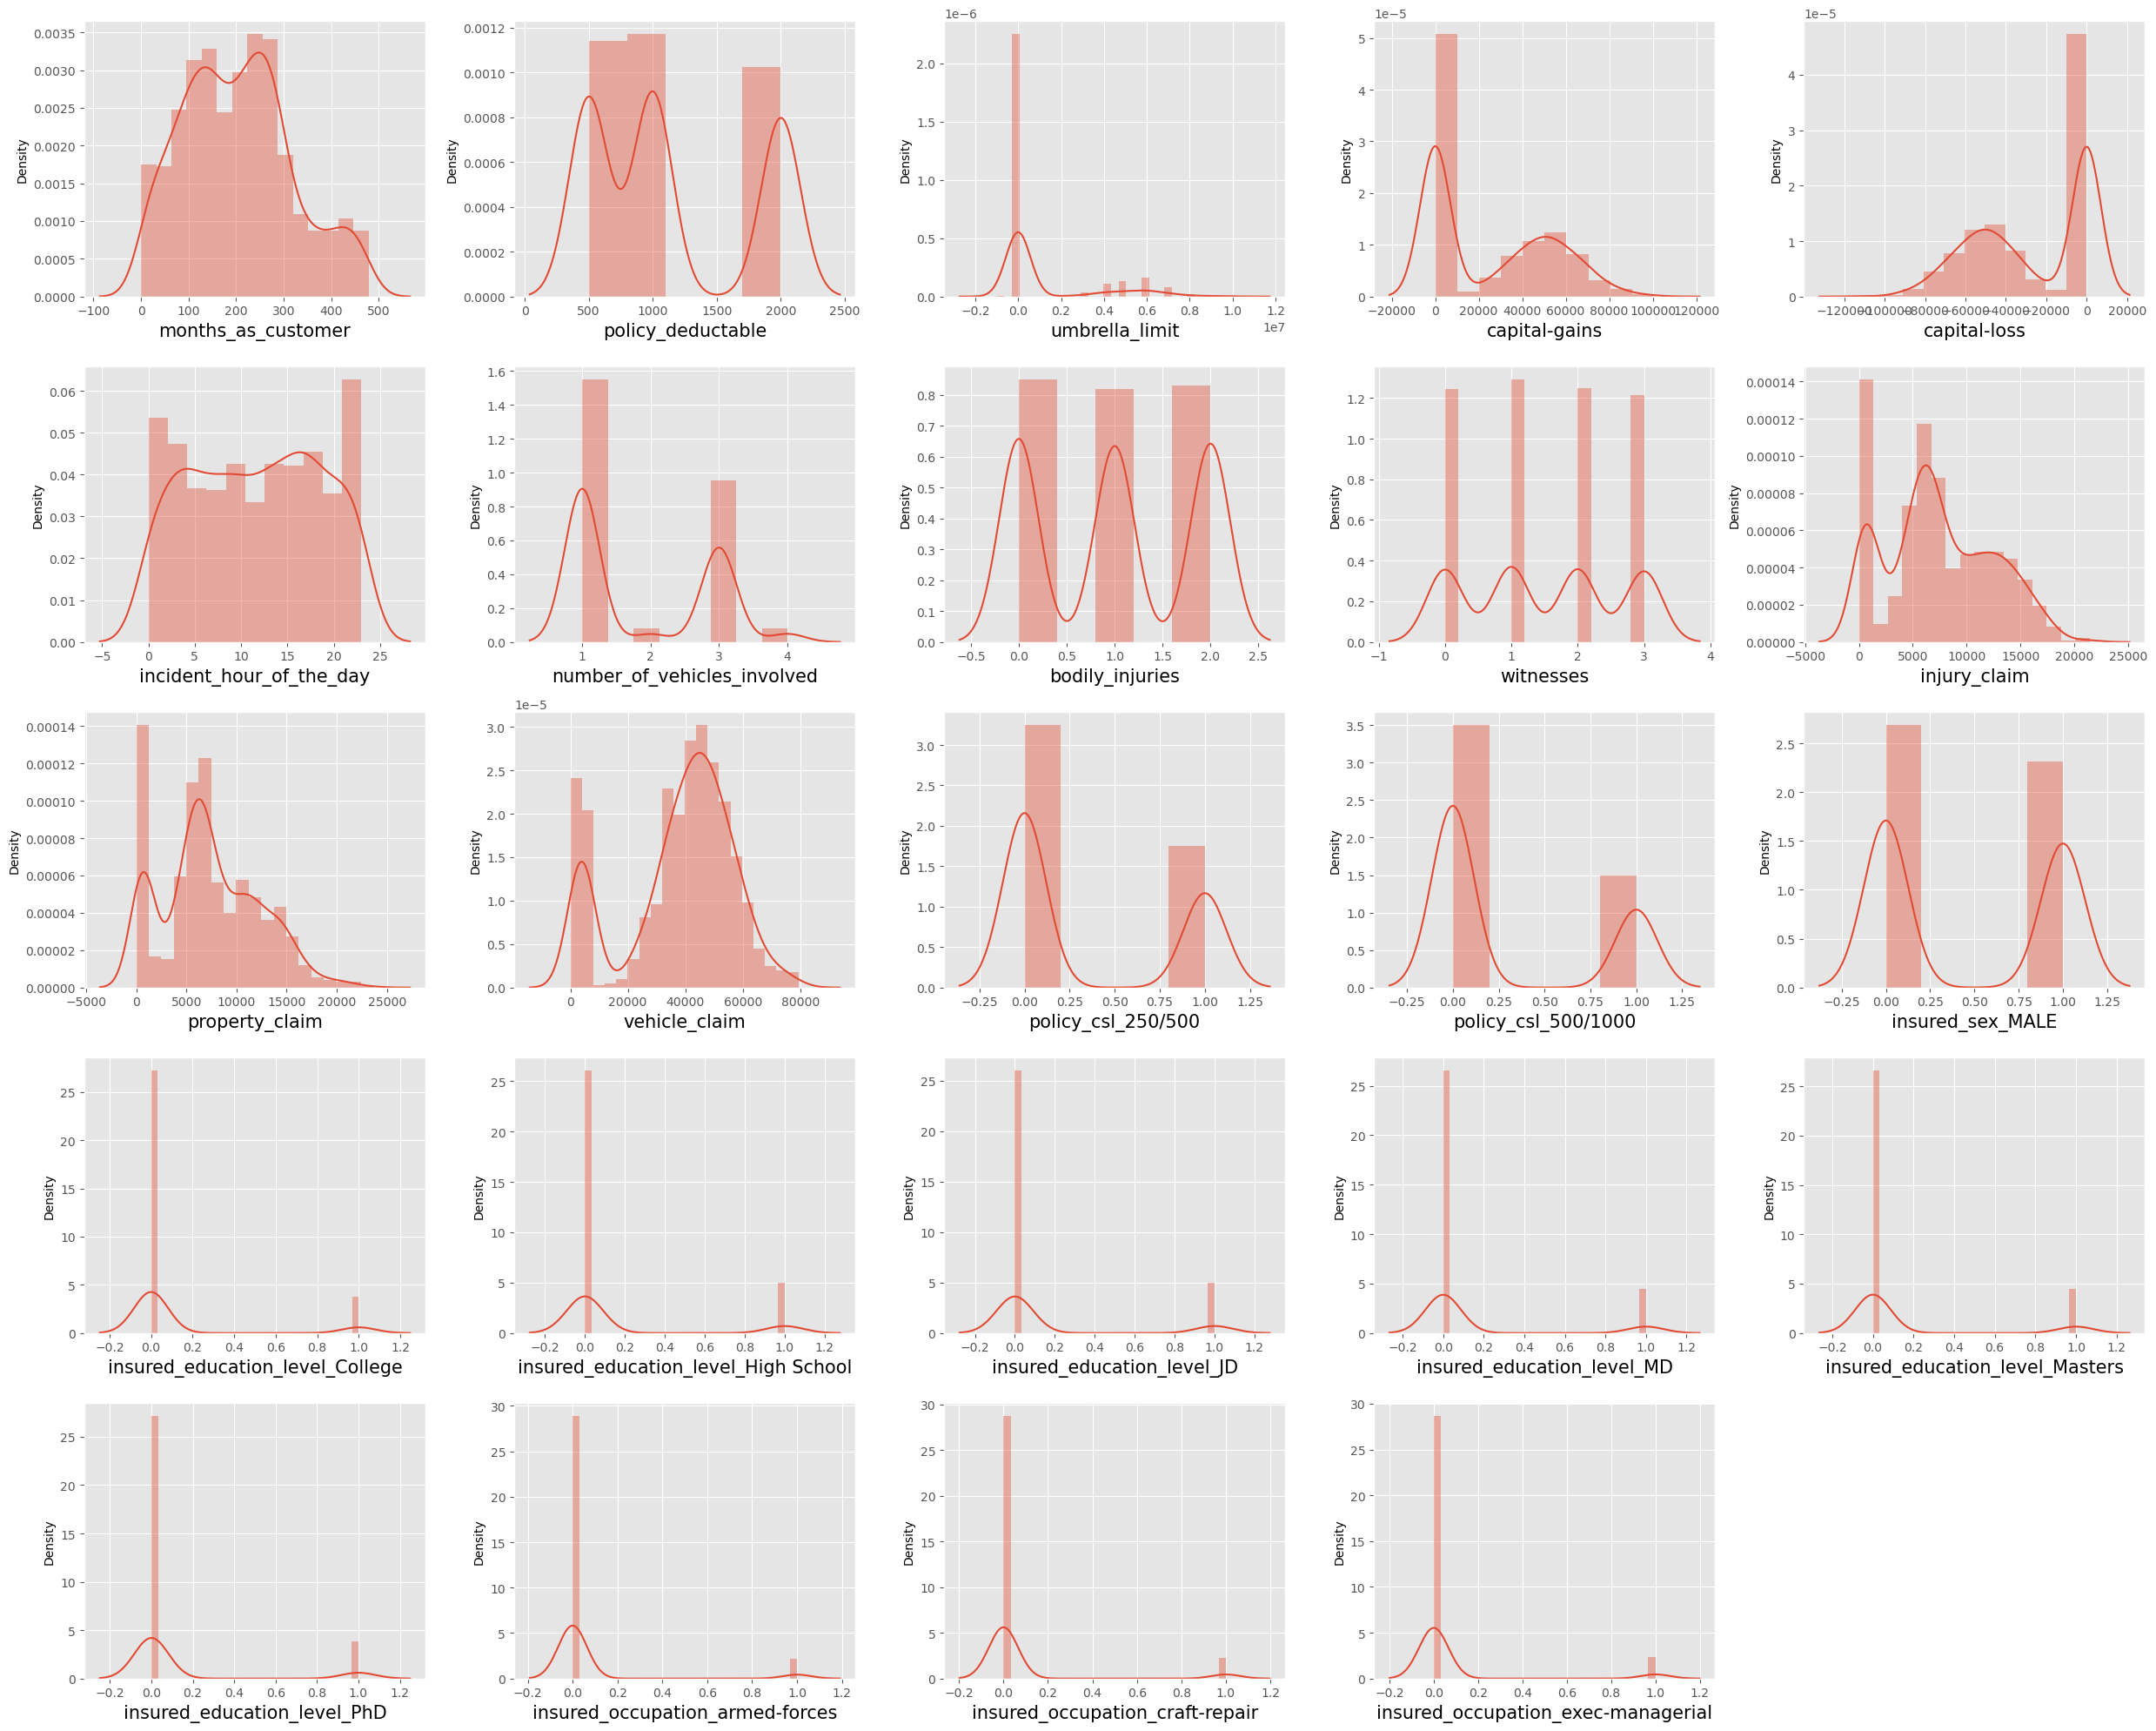

In [26]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

Data looks good, we're gonna check for outliers.

### F) Outliers Detection

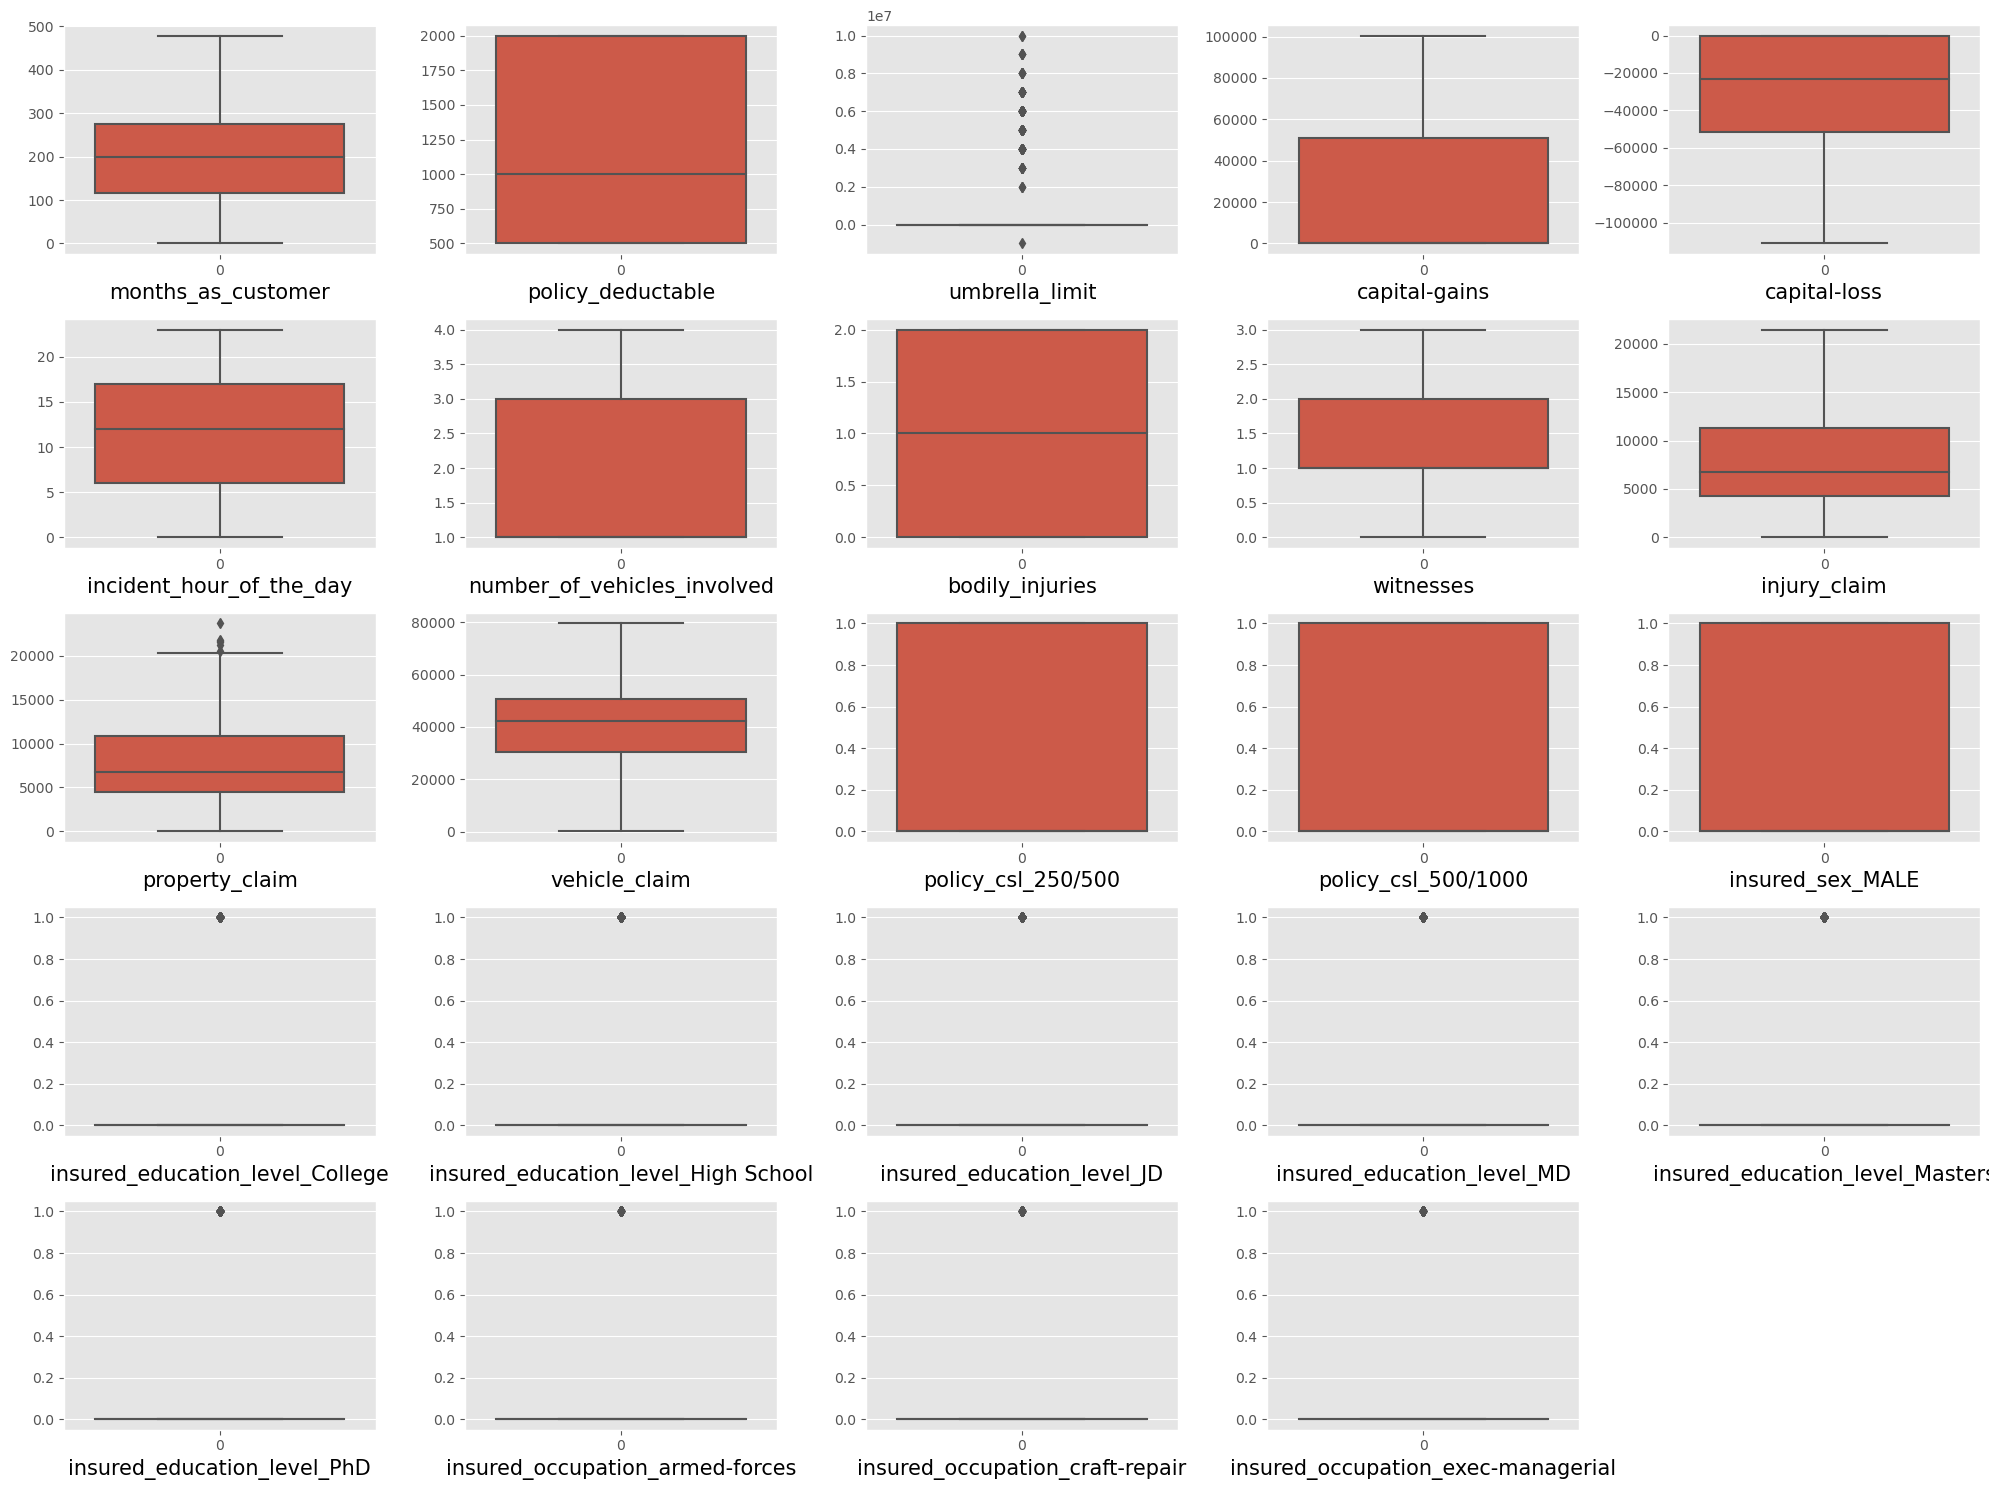

In [27]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

Outliers are present in some numerical columns we will scale numerical columns later

### G) Splitting and Scaling 

In [28]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [29]:
X_train.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
469                  35               2000               0              0   
876                 247                500               0              0   
723                 103                500               0          72100   
623                 206               1000               0              0   
570                 158               1000         3000000              0   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
469        -51900                        23                            3   
876        -49300                         5                            1   
723             0                         5                            1   
623        -74200                         2                            1   
570             0                         4                            3   

     bodily_injuries  witnesses  injury_claim  ...  \
469                2          2          5910  ...   
876                1          2           770  ...   
723                2          3           790  ...   
623                1          1          7180  ...   
570                0          1          3640  ...   

     collision_type_Side Collision  incident_severity_Minor Damage  \
469                              1                               1   
876                              0                               0   
723                              0                               1   
623                              0                               0   
570                              0                               0   

     incident_severity_Total Loss  incident_severity_Trivial Damage  \
469                             0                                 0   
876                             0                                 1   
723                             0                                 0   
623                             0                                 0   
570                             1                                 0   

     authorities_contacted_Fire  authorities_contacted_None  \
469                           1                           0   
876                           0                           0   
723                           0                           0   
623                           1                           0   
570                           0                           0   

     authorities_contacted_Other  authorities_contacted_Police  \
469                            0                             0   
876                            0                             1   
723                            0                             1   
623                            0                             0   
570                            0                             0   

     property_damage_YES  police_report_available_YES  
469                    0                            0  
876                    1                            0  
723                    0                            0  
623                    0                            0  
570                    0                            0  

[5 rows x 53 columns]

In [30]:
num_df = X_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'injury_claim', 'property_claim',
       'vehicle_claim']]

In [31]:
# Scaling the numeric values in the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

In [32]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = X_train.index)
scaled_num_df.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
469           -1.454235           1.410082       -0.495973      -0.893724   
876            0.377832          -1.036089       -0.495973      -0.893724   
723           -0.866591          -1.036089       -0.495973       1.688555   
623            0.023517          -0.220699       -0.495973      -0.893724   
570           -0.391290          -0.220699        0.772140      -0.893724   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
469     -0.867607                  1.644919                     1.143071   
876     -0.775653                 -0.935121                    -0.818721   
723      0.967936                 -0.935121                    -0.818721   
623     -1.656290                 -1.365128                    -0.818721   
570      0.967936                 -1.078457                     1.143071   

     bodily_injuries  witnesses  injury_claim  property_claim  vehicle_claim  
469         1.235631   0.463244     -0.320647        0.925111      -0.120705  
876         0.022642   0.463244     -1.360965       -1.232211      -1.707093  
723         1.235631   1.370381     -1.356917       -1.223817      -1.741385  
623         0.022642  -0.443892     -0.063604        1.458145       1.038883  
570        -1.190346  -0.443892     -0.780087       -0.027637      -0.647215

In [33]:
X_train.drop(columns = scaled_num_df.columns, inplace = True)

In [34]:
X_train = pd.concat([scaled_num_df, X_train], axis = 1)

In [35]:
X_train.head()

months_as_customer  policy_deductable  umbrella_limit  capital-gains  \
469           -1.454235           1.410082       -0.495973      -0.893724   
876            0.377832          -1.036089       -0.495973      -0.893724   
723           -0.866591          -1.036089       -0.495973       1.688555   
623            0.023517          -0.220699       -0.495973      -0.893724   
570           -0.391290          -0.220699        0.772140      -0.893724   

     capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
469     -0.867607                  1.644919                     1.143071   
876     -0.775653                 -0.935121                    -0.818721   
723      0.967936                 -0.935121                    -0.818721   
623     -1.656290                 -1.365128                    -0.818721   
570      0.967936                 -1.078457                     1.143071   

     bodily_injuries  witnesses  injury_claim  ...  \
469         1.235631   0.463244     -0.320647  ...   
876         0.022642   0.463244     -1.360965  ...   
723         1.235631   1.370381     -1.356917  ...   
623         0.022642  -0.443892     -0.063604  ...   
570        -1.190346  -0.443892     -0.780087  ...   

     collision_type_Side Collision  incident_severity_Minor Damage  \
469                              1                               1   
876                              0                               0   
723                              0                               1   
623                              0                               0   
570                              0                               0   

     incident_severity_Total Loss  incident_severity_Trivial Damage  \
469                             0                                 0   
876                             0                                 1   
723                             0                                 0   
623                             0                                 0   
570                             1                                 0   

     authorities_contacted_Fire  authorities_contacted_None  \
469                           1                           0   
876                           0                           0   
723                           0                           0   
623                           1                           0   
570                           0                           0   

     authorities_contacted_Other  authorities_contacted_Police  \
469                            0                             0   
876                            0                             1   
723                            0                             1   
623                            0                             0   
570                            0                             0   

     property_damage_YES  police_report_available_YES  
469                    0                            0  
876                    1                            0  
723                    0                            0  
623                    0                            0  
570                    0                            0  

[5 rows x 53 columns]

## 3. Models

### A) Support Vector Machine

In [36]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

In [37]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

svc_train_acc = accuracy_score(y_train, svc.predict(X_train))
svc_test_acc = accuracy_score(y_test, y_pred)
svc_test_recall = recall_score(y_test, y_pred, average="binary", pos_label='Y')

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Support Vector Classifier is : 0.852
Test accuracy of Support Vector Classifier is : 0.724
[[181   0]
 [ 69   0]]
              precision    recall  f1-score   support

           N       0.72      1.00      0.84       181
           Y       0.00      0.00      0.00        69

    accuracy                           0.72       250
   macro avg       0.36      0.50      0.42       250
weighted avg       0.52      0.72      0.61       250



### B) K-Nearest Neighbor

In [38]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [39]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_train_acc = accuracy_score(y_train, knn.predict(X_train))
knn_test_acc = accuracy_score(y_test, y_pred)
knn_test_recall = recall_score(y_test, y_pred, average="binary", pos_label='Y')

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of KNN is : 0.7626666666666667
Test accuracy of KNN is : 0.724
[[181   0]
 [ 69   0]]
              precision    recall  f1-score   support

           N       0.72      1.00      0.84       181
           Y       0.00      0.00      0.00        69

    accuracy                           0.72       250
   macro avg       0.36      0.50      0.42       250
weighted avg       0.52      0.72      0.61       250



### C) Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

In [41]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)
dtc_test_recall = recall_score(y_test, y_pred, average="binary", pos_label='Y')

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.504
[[93 88]
 [36 33]]
              precision    recall  f1-score   support

           N       0.72      0.51      0.60       181
           Y       0.27      0.48      0.35        69

    accuracy                           0.50       250
   macro avg       0.50      0.50      0.47       250
weighted avg       0.60      0.50      0.53       250



In [42]:
# hyper parameter tuning

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [43]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 8, 'min_samples_split': 3}
0.8066666666666666


In [44]:
# best estimator 

dtc = grid_search.best_estimator_

y_pred = dtc.predict(X_test)

In [45]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(X_train))
dtc_test_acc = accuracy_score(y_test, y_pred)
dtc_test_recall = recall_score(y_test, y_pred, average="binary", pos_label='Y')

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 0.8106666666666666
Test accuracy of Decision Tree is : 0.82
[[153  28]
 [ 17  52]]
              precision    recall  f1-score   support

           N       0.90      0.85      0.87       181
           Y       0.65      0.75      0.70        69

    accuracy                           0.82       250
   macro avg       0.78      0.80      0.78       250
weighted avg       0.83      0.82      0.82       250



### D) Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 3, n_estimators= 140)
rand_clf.fit(X_train, y_train)

y_pred = rand_clf.predict(X_test)

In [47]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rand_clf_train_acc = accuracy_score(y_train, rand_clf.predict(X_train))
rand_clf_test_acc = accuracy_score(y_test, y_pred)
rand_test_recall = recall_score(y_test, y_pred, average="binary", pos_label='Y')

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Random Forest is : 0.9626666666666667
Test accuracy of Random Forest is : 0.748
[[176   5]
 [ 58  11]]
              precision    recall  f1-score   support

           N       0.75      0.97      0.85       181
           Y       0.69      0.16      0.26        69

    accuracy                           0.75       250
   macro avg       0.72      0.57      0.55       250
weighted avg       0.73      0.75      0.69       250



## 4. Model Comparison

In [49]:
models = pd.DataFrame({
    'Model' : ['SVC', 'KNN', 'Decision Tree', 'Random Forest'],
    'Score' : [svc_test_recall, knn_test_recall, dtc_test_recall, rand_test_recall]
})


models.sort_values(by = 'Score', ascending = False)

Model     Score
2  Decision Tree  0.753623
3  Random Forest  0.159420
0            SVC  0.000000
1            KNN  0.000000

In [50]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')

Because we're dealing with Fraud Detection, we want to focus more on FN (False Negative), that's why we're going to use Recall as evaluation matrix.
- SVM : Out of all frauds, the model only predicted this outcome correctly for 0% of those frauds.
- KNN : Out of all frauds, the model only predicted this outcome correctly for 0% of those frauds.
- Decision Tree : Out of all the actual frauds, the model only predicted this outcome correctly for 75% of those frauds.
- Random Forest : Out of all the actual frauds, the model only predicted this outcome correctly for 15% of those frauds.

It means that decision tree, gives us the best predictions.